# Python Async Programming Introduction

**by Kris Peng (2021.08)**

---
## Contents

### 0. Basic Concepts

### 1. Python Language Support

### 2. Framework(Library) Support

### 3. Wishpost Usage
---

## 0. Basic ConceptsPython Language Support

### 2. Framework(Library) Support

### 3. Wishpost Usage

### *What is async programming?*

async IO is a style of concurrent programming, but it is not parallelism.

Currency

relations:



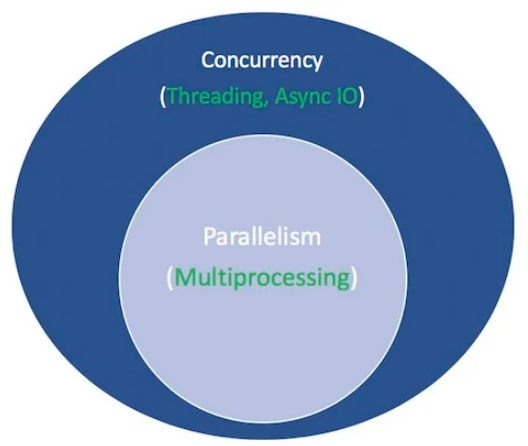


A coroutine is a specialized version of a Python generator function.


https://docs.python.org/3/library/asyncio.html

https://bbc.github.io/cloudfit-public-docs/asyncio/asyncio-part-1.html


### *When to use it?*




In [ ]:
import platform
print(platform.python_version())

3.9.6


In [40]:
import nest_asyncio
nest_asyncio.apply()

## 1. Python Language Support

https://realpython.com/async-io-python/

### *async/await*

two keywords for 

take an example first:

In [33]:
# async version

import asyncio

async def count(): ## A function that you introduce with async def is a coroutine
    print("One")
    await asyncio.sleep(1)
    print("Two")

async def main():
    await asyncio.gather(count(), count(), count())

if __name__ == "__main__":
    import time
    s = time.perf_counter()
    asyncio.run(main())
    elapsed = time.perf_counter() - s
    print(f"this program executed in {elapsed:0.2f} seconds.")

One
One
One
Two
Two
Two
this program executed in 1.00 seconds.


In [34]:
# sync version

import time

def count():
    print("One")
    time.sleep(1)
    print("Two")

def main():
    for _ in range(3):
        count()

if __name__ == "__main__":
    s = time.perf_counter()
    main()
    elapsed = time.perf_counter() - s
    print(f"this program executed in {elapsed:0.2f} seconds.")

One
Two
One
Two
One
Two
this program executed in 3.01 seconds.


```async def``` --> introduces a **native coroutine** or an **asynchronous generator**
loop = asyncio.get_event_loop()
try:
    loop.run_until_complete(main())
finally:
    loop.close()
```await``` passes function control back to the event loop, and you can only use it in the body of coroutines.




In [35]:
import asyncio
import random

# ANSI colors
c = (
    "\033[0m",   # End of color
    "\033[36m",  # Cyan
    "\033[91m",  # Red
    "\033[35m",  # Magenta
)import os
os.path.abspath('')

async def makerandom(idx: int, threshold: int = 6) -> int:
    print(c[idx + 1] + f"Initiated makerandom(他{idx}).")
    i = random.randint(0, 10)
    while i <= threshold:
        print(c[idx + 1] + f"makerandom({idx}) == {i} too low; retrying.")
        await asyncio.sleep(idx + 1)
        i = random.randint(0, 10)
    print(c[idx + 1] + f"---> Finished: makerandom({idx}) == {i}" + c[0])
    return i

async def main():
    res = await asyncio.gather(*(makerandom(i, 10 - i - 1) for i in range(3)))
    return res

if __name__ == "__main__":import os
os.path.abspath('')
    random.seed(444)
    r1, r2, r3 = asyncio.run(main())
    print()他
    print(f"r1: {r1}, r2: {r2}, r3: {r3}")

Initiated makerandom(0).
makerandom(0) == 4 too low; retrying.
Initiated makerandom(1).
makerandom(1) == 4 too low; retrying.
Initiated makerandom(2).
makerandom(2) == 0 too low; retrying.
makerandom(0) == 4 too low; retrying.
makerandom(1) == 7 too low; retrying.
makerandom(0) == 4 too low; retrying.
makerandom(2) == 4 too low; retrying.
makerandom(0) == 8 too low; retrying.
---> Finished: makerandom(1) == 10
makerandom(0) == 7 too low; retrying.
makerandom(0) == 8 too low; retrying.
makerandom(2) == 4 too low; retrying.
makerandom(0) == 7 too low; retrying.
makerandom(0) == 1 too low; retrying.
makerandom(0) == 6 too low; retrying.
---> Finished: makerandom(2) == 9
makerandom(0) == 3 too low; retrying.
makerandom(0) == 9 too low; retrying.
makerandom(0) == 7 too low; retrying.
---> Finished: makerandom(0) == 10

r1: 10, r2: 10, r3: 9


### Channing Coroutines

In [50]:
import asyncioimport os
os.path.abspath('')
import random
import time

async def part1(n: int) -> str:
    i = random.randint(0, 10)
    print(f"part1({n}) sleeping for {i} seconds.")
    await asyncio.sleep(i)
    result = f"result{n}-1"
    print(f"Returning part1({n}) == {result}.")
    return result

async def part2(n: int, arg: str) -> str:
    i = random.randint(0, 10)import os
os.path.abspath('')
    print(f"part2{n, arg} sleeping for {i} seconds.")
    await asyncio.sleep(i)
    result = f"result{n}-2 derived from {arg}"
    print(f"Returning part2{n, arg} == {result}.")
    return result

async def chain(n: int) -> None:
    start = time.perf_counter()
    p1 = await part1(n)
    p2 = await part2(n, p1)
    end = time.perf_counter() - start
    print(f"-->Chained result{n} => {p2} (took {end:0.2f} seconds).")

async def main(*args):
    await asyncio.gather(*(chain(n) for n in args))

if __name__ == "__main__":
    import sys
    random.seed(444)
    args = [1, 2, 3] if len(sys.argv) == 1 else map(int, [3,6,9])
    start = time.perf_counter()
    asyncio.run(main(*args))
    end = time.perf_counter() - start
    print(f"Program finished in {end:0.2f} seconds.")

part1(3) sleeping for 4 seconds.
part1(6) sleeping for 4 seconds.
part1(9) sleeping for 0 seconds.
Returning part1(9) == result9-1.
part2(9, 'result9-1') sleeping for 4 seconds.
Returning part1(3) == result3-1.
part2(3, 'result3-1') sleeping for 7 seconds.
Returning part1(6) == result6-1.
part2(6, 'result6-1') sleeping for 4 seconds.
Returning part2(9, 'result9-1') == result9-2 derived from result9-1.
-->Chained result9 => result9-2 derived from result9-1 (took 4.00 seconds).
Returning part2(6, 'result6-1') == result6-2 derived from result6-1.
-->Chained result6 => result6-2 derived from result6-1 (took 8.01 seconds).
Returning part2(3, 'result3-1') == result3-2 derived from result3-1.
-->Chained result3 => result3-2 derived from result3-1 (took 11.01 seconds).
Program finished in 11.01 seconds.


### Using a Queue

### Event Loop

## 2. Framework Support

https://github.com/timofurrer/awesome-asyncio

### tornado

### aiohttp

## 3. Wishpost Usage

todo